# Titanic: Predicting Survival

This notebook walks through a complete data science project to predict passenger survival on the Titanic. The workflow is structured as follows:

1.  **Exploratory Data Analysis (EDA):** Understand the dataset, find patterns, and identify missing data.
2.  **Feature Engineering & Preprocessing:** Clean the data, handle missing values, and create new features to improve model performance.
3.  **Modeling & Evaluation:** Train several machine learning models and select the best one based on performance.
4.  **Submission:** Generate a prediction file for the test set.

## 1. Setup and Data Loading

In [ ]:
# Install necessary packages
!pip install pandas scikit-learn matplotlib seaborn 

In [77]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# Load the training and test data
df = pd.read_csv('data/train.csv')

In [79]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [80]:
# see missing values some adn also percentage of this 
round(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

Cabin          77.0
Age            20.0
PassengerId     0.0
Survived        0.0
Name            0.0
Pclass          0.0
SibSp           0.0
Sex             0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Embarked        0.0
dtype: float64

In [81]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

<Axes: >

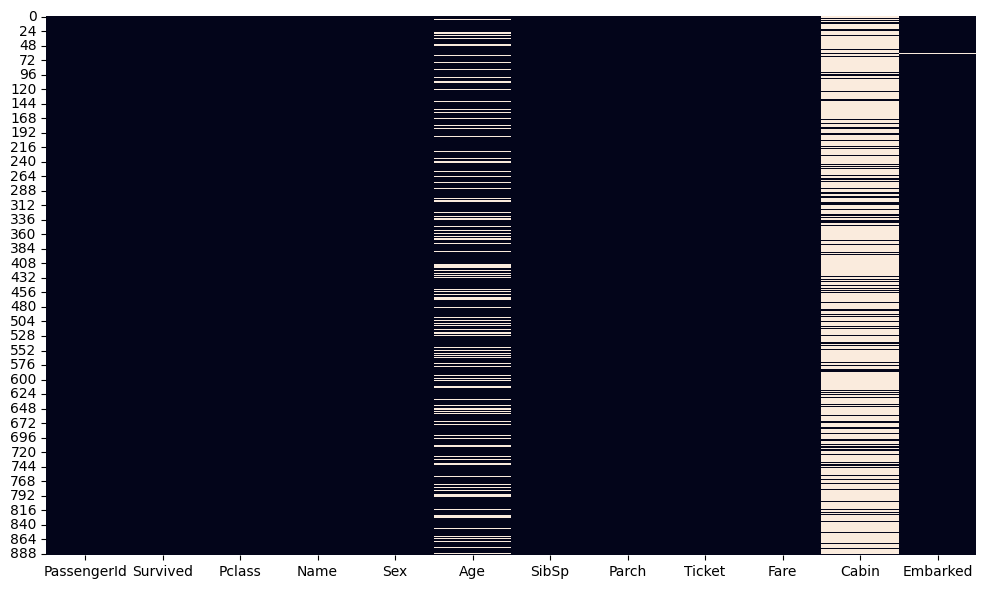

In [82]:
# visulize missing valuse
plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), cbar=False)


In [88]:
# Fill missing values safely (no chained assignment)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Cabin'] = df['Cabin'].fillna('U')  # 'U' for Unknown

In [89]:
df.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [91]:
# Summary statistics
df.describe()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

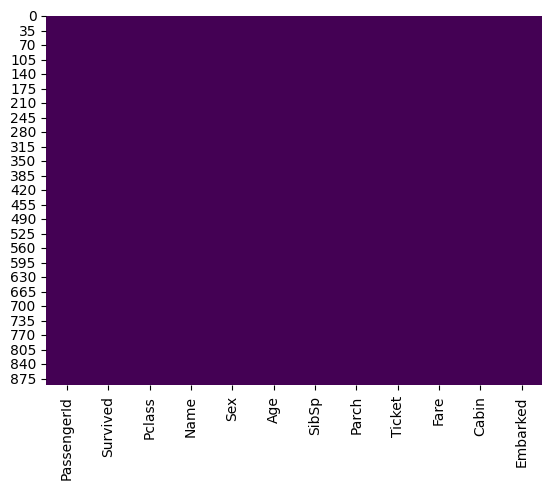

In [93]:
# Visualize missing values (sanity check)
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")

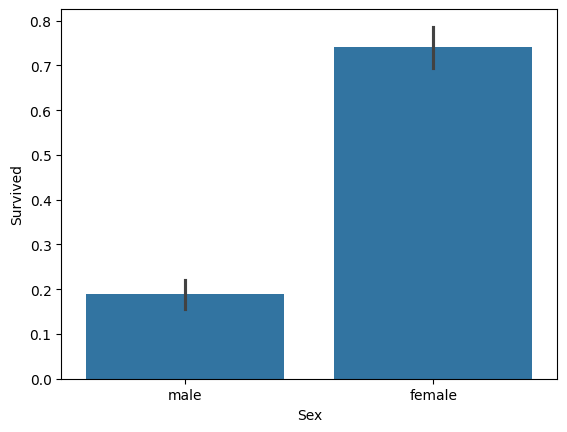

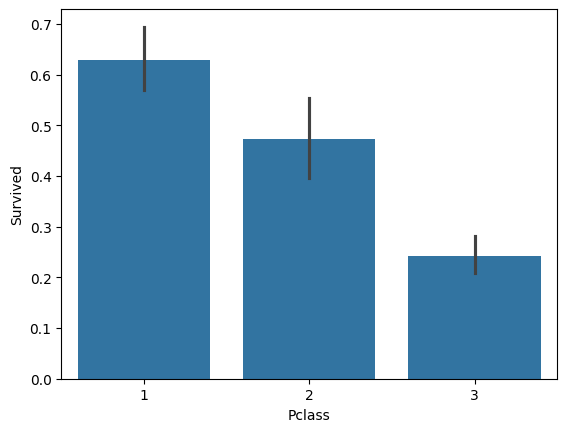

In [97]:
# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

# Survival rate by class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()


In [100]:
# Label encoding or one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Cabin'], drop_first=True)


In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
# Drop irrelevant columns
df = df.drop(['Name', 'Ticket', 'Cabin', 'Passenger_id'], axis=1, errors='ignore')

# Define features and target
X = df.drop('Survived', axis=1)
y = df['Survived']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# ✅ 1. Exploratory Data Analysis (EDA)

In [102]:
df.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_U
0,1,0,3,-0.565736,1,0,-0.502445,True,False,True,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,0.663861,1,0,0.786845,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,-0.258337,0,0,-0.488854,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,0.433312,1,0,0.420730,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,5,0,3,0.433312,0,0,-0.486337,True,False,True,...,False,False,False,False,False,False,False,False,False,True


In [103]:
# Check columns
print("Columns:", df.columns)

Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_male', 'Embarked_Q', 'Embarked_S',
       ...
       'Cabin_F E69', 'Cabin_F G63', 'Cabin_F G73', 'Cabin_F2', 'Cabin_F33',
       'Cabin_F38', 'Cabin_F4', 'Cabin_G6', 'Cabin_T', 'Cabin_U'],
      dtype='object', length=157)


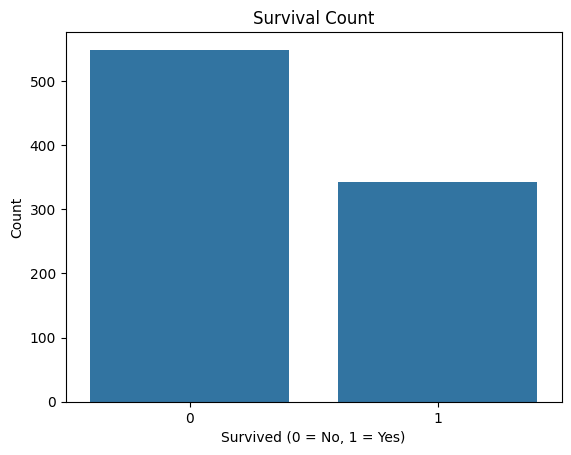

In [105]:
# Countplot: Survival Count
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()



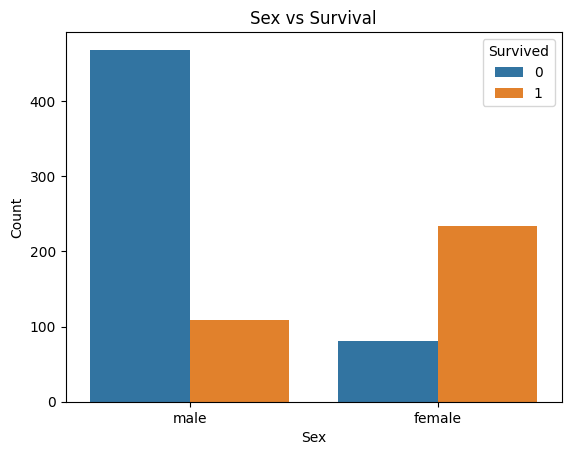

In [106]:
# Sex column from 'sex_male' (reverse one-hot encoding)
df['Sex'] = df['Sex_male'].apply(lambda x: 'male' if x == 1 else 'female')

# Countplot: Sex vs Survival
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Sex vs Survival")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()



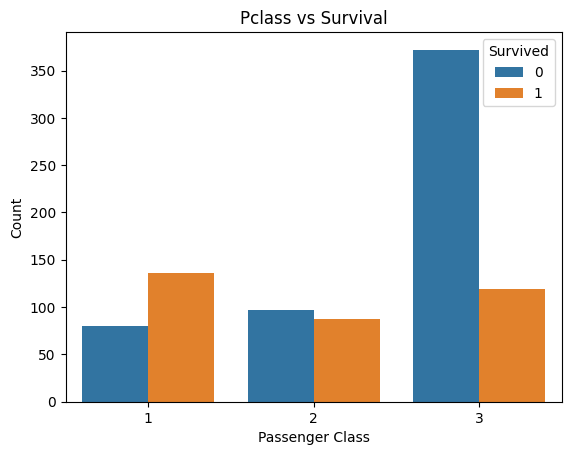

In [108]:
# Pclass vs Survival
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Pclass vs Survival")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()



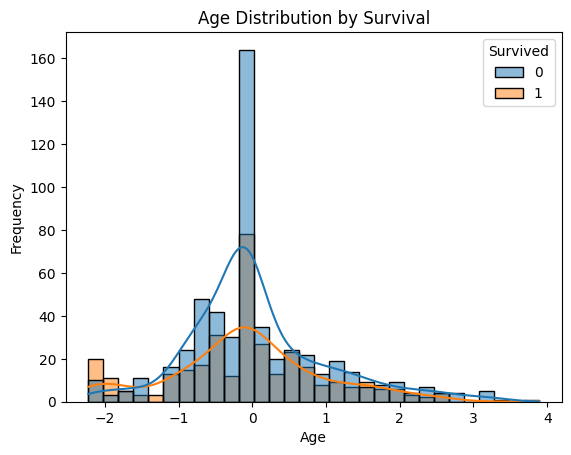

In [109]:
# Age Distribution
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()



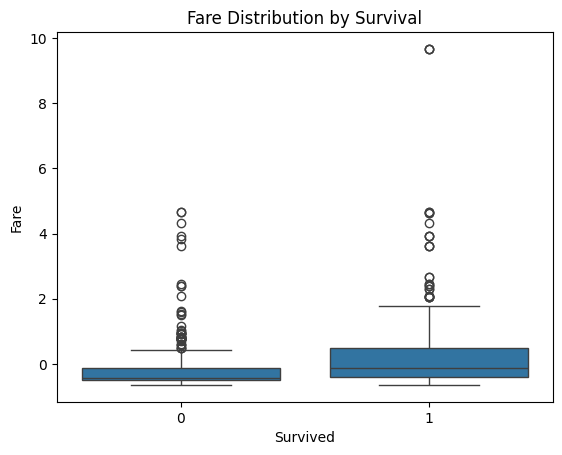

In [110]:
# Fare Distribution
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare Distribution by Survival")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.show()



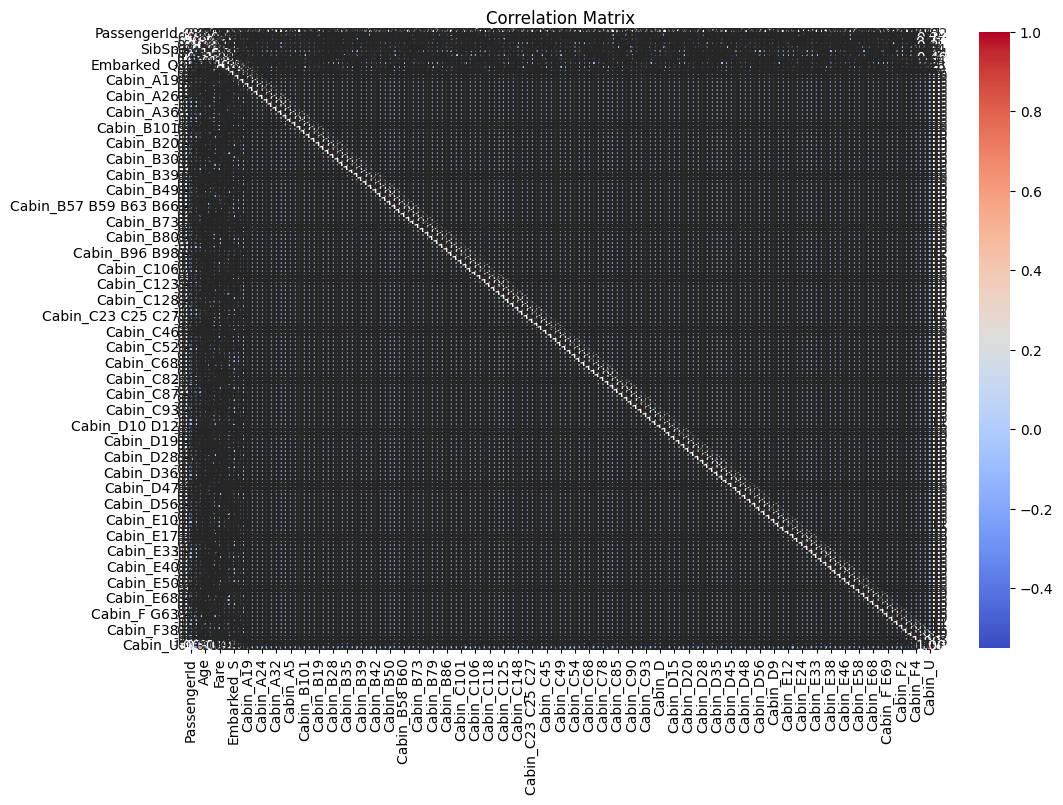

In [116]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Train Model

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("Survived", axis=1)   # features
y = df["Survived"]               # target


In [137]:
# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=["object", "bool"]).columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns

In [138]:
# Preprocessor: OneHot for categorical, passthrough for numeric
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)


In [139]:
# Pipeline with preprocessing + model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

In [140]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
# Fit
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [142]:
# Predict
y_pred = model.predict(X_test)

In [143]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.83      0.68      0.75        74

    accuracy                           0.81       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



# Save Submission file 


- Step 1: Import Libraries

In [144]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


- Step 2: Load Data

In [145]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")


- Step 3: Split Features & Target

In [146]:
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

- Step 4: Select Feature Columns

In [147]:
categorical_cols = ["Sex", "Embarked"]
numeric_cols = ["Age", "Fare", "Pclass", "SibSp", "Parch"]

- Step 5: Preprocessing Pipelines

In [148]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])


- Step 6: Combine Preprocessing Steps

In [149]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ])


- Step 7: Build Model Pipeline + Train

In [152]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("clf", RandomForestClassifier(random_state=42))
])

model.fit(X[numeric_cols + categorical_cols], y)


,steps,"[('preprocessor', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


- Step 8: Make Predictions & Create Submission

In [ ]:
predictions = model.predict(test_df[numeric_cols + categorical_cols])

submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": predictions
})

submission.to_csv("submission.csv", index=False)
print("✅ submission.csv saved!") 


✅ submission.csv saved!
